<a href="https://colab.research.google.com/github/felipesolferini/combustioncourse/blob/main/car_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[145.7766990291262, 68.30097087378641, 2.621359223300971, 2.3300970873786406, 0.5825242718446602, 1.7475728155339805]
[110.61946903  50.70058997   2.76548673]


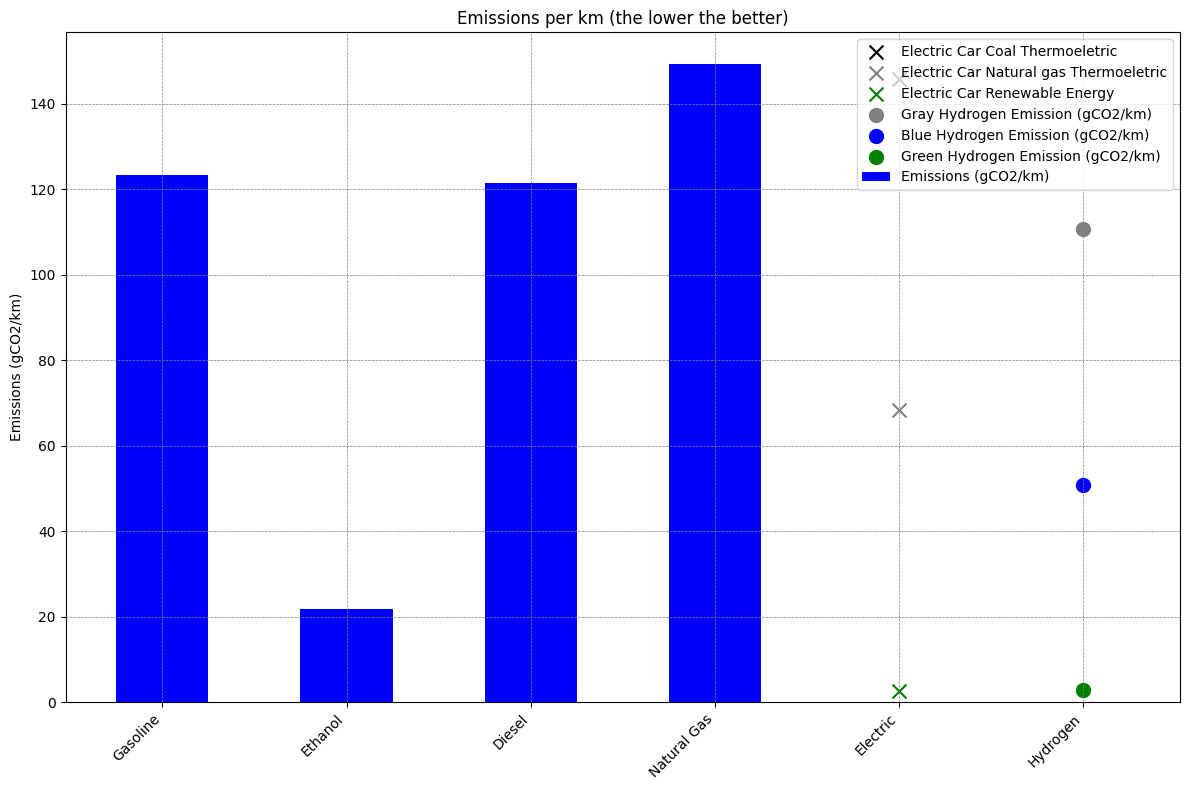

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
#cars considered = ["2023 Hybrid Corolla - Gasoline with 27% Ethanol", "2023 Hybrid Corolla - Ethanol with 5% water",
       # "2023 Corolla - Diesel", "Onix 2023 - with Natural Gas adaptation", "Tesla Model S Standard", "Toyota Mirai"]

cars = ["Gasoline", "Ethanol", "Diesel", "Natural Gas", "Electric", "Hydrogen"]

consumption = [17.9, 11.8, 21.42, 13, 0, 108.48]  # km/l, km/l, km/l, km/m³, km/kWh, km/kg
tank_capacity = [43, 43, 43, 15, 75, 5.964]  # liters, liters, liters, m³, kWh, kg
range_km = [770, 500, 920, 200, 515, 647]  # range in km

emission_factors = [2.21, 0.253, 2.60, 1.99, 0, 0]  # kgCO2eq/liter, kgCO2eq/liter, kgCO2eq/liter, kgCO2/m³, kgCO2/kWh, kgCO2/kg
total_emissions = [emission_factors[i] * tank_capacity[i] for i in range(len(cars))]  # total emissions
range_emissions = [1000 * total_emissions[i] / range_km[i] for i in range(len(cars))]  # emissions per km

# Electric car emissions (Tesla)
#Carbon intensities for: Coal, Natural gas, biopower, nuclear, hydropower, wind, Solar PV, Solar Thermal and Geothermal
carbon_intensities = [1001, 469, 18, 16, 4, 12, 46, 22, 45]  # gCO2/kWh
electric_car_emissions = [tank_capacity[4] * carbon_intensities[i] / range_km[4] for i in range(len(cars))] # gCO2/km for Tesla
print(electric_car_emissions)

# Hydrogen car emissions (Mirai)
hydrogen_emissions = np.array([12, 5.5, 0.3])  # kgCO2/kgH2 for gray, blue, and green hydrogen
hydrogen_car_emissions = 1000 * hydrogen_emissions / consumption[5]  # gCO2/km for Mirai
print(hydrogen_car_emissions)

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 8))
x_pos = np.arange(len(cars))

# Plot for range emissions (total emissions per km)
ax1.bar(x_pos, range_emissions, width=0.5, color='blue', label="Emissions (gCO2/km)")

# Adding electric car emissions as a single dot for Tesla Model S
ax1.scatter(x_pos[4], electric_car_emissions[0], color='black', s=100, marker='x', label="Electric Car Coal Thermoeletric")
ax1.scatter(x_pos[4], electric_car_emissions[1], color='gray', s=100, marker='x', label="Electric Car Natural gas Thermoeletric")
ax1.scatter(x_pos[4], electric_car_emissions[2], color='green', s=100, marker='x', label="Electric Car Renewable Energy")


# Adding hydrogen car emissions as dots for Toyota Mirai with different colors for each type of hydrogen
ax1.scatter(x_pos[5], hydrogen_car_emissions[0], color='gray', s=100, marker='o', label="Gray Hydrogen Emission (gCO2/km)")
ax1.scatter(x_pos[5], hydrogen_car_emissions[1], color='blue', s=100, marker='o', label="Blue Hydrogen Emission (gCO2/km)")
ax1.scatter(x_pos[5], hydrogen_car_emissions[2], color='green', s=100, marker='o', label="Green Hydrogen Emission (gCO2/km)")

# Customize the plot
ax1.set_ylabel("Emissions (gCO2/km)")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(cars, rotation=45, ha='right')

# Legend
ax1.legend(loc="upper right")

# Adding grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

plt.title("Emissions per km (the lower the better)")
plt.tight_layout()
plt.show()



